In [ ]:
print "The answer should be three: " + str(1+2)

In [2]:
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [3]:
import numpy as np
import theano
# By convention, the tensor submodule is loaded as T
import theano.tensor as T

# Symbolic variables 

In [4]:
a = T.scalar('a')

# Define another variable as a squared
b = a**2

# b will also be a theano variable
print type(b)

# We can inspect how b is defined using theano's pretty print function
print theano.pp(b)

<class 'theano.tensor.var.TensorVariable'>
(a ** TensorConstant{2})


# Functions
Symbolic functions

In [5]:
f = theano.function([a],b)
print f(2)


4.0


In [6]:
print b.eval({a: 2})

4.0


In [7]:
# theano.tensor (vectors, matrices, and tensors)
# Define symbolic matrix and vector variables
A = T.matrix('A')
x = T.vector('x')

# Define a symbolic function using these variables
y = T.dot(A, x)

# Define a theano function to compute y
linear_func = theano.function([A, x], y)

# Supply numeric values for A and x
print linear_func(np.array([[1,2,3],[4,5,6]], dtype=theano.config.floatX),
                  np.array([1,2,3], dtype=theano.config.floatX))

[ 14.  32.]


# Toy Example of Logistic Regression


In [8]:
# Import some necessary Python visualization modules
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

# Generate 50 random 2-D points
x = np.random.random((50,2)).astype('float32')

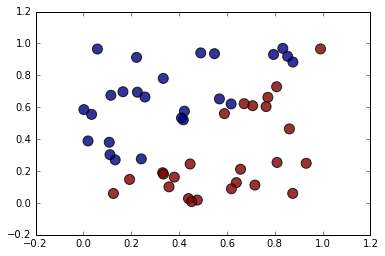

In [10]:
# If point is above y=x then class is 1,
# otherwise class is 0
y = np.zeros((50,)).astype('int32')
y[x[:,0]>x[:,1]] = 1

# Plot the points 
plt.scatter(x[:,0], x[:,1], c=y, s=100, alpha=0.8)
plt.show()

Using logistic regression, a probabilistic linear classifier, we will
try to determine if an input vector *x* belongs to class *i*. We use *softmax* function, which is used to represent a categorical distribution. In other words, we want to determine the category to which this input belongs. This type of function highlights the largest values and supresses those that significantly below the maximum value (see this [link](https://en.wikipedia.org/wiki/Softmax_function) for more detail).

In [11]:
## Let's define a logistic regression Class
class LogisticRegression(object):
    
    def __init__(self, input, n_in, n_out):

        # Initialize pseudo-random number generator
        rng = np.random.RandomState(1234)
        
        # Randomly generate weight matrix W
        W_values = np.asarray(
            rng.uniform(
                low=-np.sqrt(6. / (n_in + n_out)),
                high=np.sqrt(6. / (n_in + n_out)),
                size=(n_in, n_out)
            ),
            dtype=theano.config.floatX
        )

        self.W = theano.shared(value=W_values, name='W', borrow=True)        

        # Randomly initialize bias vector b
        b_values = np.zeros((n_out,), dtype=theano.config.floatX)
        self.b = theano.shared(value=b_values, name='b', borrow=True)

        # Define feed-forward function
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)
        
        # Specify parameters of layer
        self.params = [self.W, self.b]
        
    def predict(self, input):
        
        # Function to apply layer feedforward to new input data
        return T.nnet.softmax(T.dot(input, self.W) + self.b)

Pr(Y=*i*|x, W, b) = *softmax_i*(W *x* + *b*)

In [12]:
# Define theano shared variables for the input data and labels
shared_x = theano.shared(np.asarray(x, dtype=theano.config.floatX), borrow=True)
shared_y = theano.shared(np.asarray(y, dtype=theano.config.floatX), borrow=True)
shared_y = T.cast(shared_y, 'int32')

# Initialize a logistic regressor with 2-dimensional inputs
# and 2 classes for output with the first row of x as input
lr = LogisticRegression(shared_x[0,:], 2, 2)
# Feed the first data sample from x through the regressor and print output
print lr.p_y_given_x.eval()

[[ 0.27409227  0.72590773]]


In [13]:
# Initialize a logistic regressor with 2-dimensional inputs
# and 2 classes for output but now with all of x as input
lr = LogisticRegression(shared_x, 2, 2)
# Print the first 10 data samples from x through the regressor and print output
print lr.p_y_given_x.eval()[:10]

[[ 0.27409227  0.72590773]
 [ 0.3733685   0.6266315 ]
 [ 0.15757395  0.84242605]
 [ 0.37507542  0.62492458]
 [ 0.25535897  0.74464103]
 [ 0.21102775  0.78897225]
 [ 0.29462324  0.70537676]
 [ 0.29242799  0.70757201]
 [ 0.38620675  0.61379325]
 [ 0.37546682  0.62453318]]


# References
This is based on a project on github by [daviddao](https://github.com/daviddao/nvidia-deep-learning-tutorial/blob/master/Getting%20started%20with%20Theano.ipynb)
